Wind Power Generation - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:

# importing all the necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra
import matplotlib.pyplot as plt # visualization lib
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler # scaling

In [3]:
# Set plotting style
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [4]:

# Load the csv (Dataset) files
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

In [5]:
# Add a new column to identify the location
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

merged_data.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  2017-01-02 00:00:00            28.5                   85         24.5   
1  2017-01-02 01:00:00            28.4                   86         24.7   
2  2017-01-02 02:00:00            26.8                   91         24.5   
3  2017-01-02 03:00:00            27.4                   88         24.3   
4  2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power   Location  
0            1.4  0.1635  Location1  
1            4.4  0.1424  Location1  
2            3.2  0.1214  Location1  
3            1.6  0.1003  Location1  
4            4.0  0.0793  Location1

In [6]:
# Save the merged dataset to a new CSV file
merged_data.to_csv('merged_locations.csv', index=False)

In [7]:
# To see the basic information about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [8]:
# To check the statistics of Dataset
merged_data.describe().T

count        mean         std   min       25%  \
temperature_2m       175200.0   46.655994   22.012738 -31.2   30.2000   
relativehumidity_2m  175200.0   70.155291   17.326678   9.0   57.0000   
dewpoint_2m          175200.0   36.516241   20.933153 -36.2   21.9000   
windspeed_10m        175200.0    4.157639    2.012682   0.0    2.6300   
windspeed_100m       175200.0    6.879334    3.043964   0.0    4.7000   
winddirection_10m    175200.0  201.589446   99.639040   1.0  130.0000   
winddirection_100m   175200.0  201.539070  100.683777   0.0  129.0000   
windgusts_10m        175200.0    8.038205    3.617488   0.5    5.3000   
Power                175200.0    0.303429    0.257325   0.0    0.0877   

                          50%       75%       max  
temperature_2m        46.9000   65.3000  101.7000  
relativehumidity_2m   72.0000   84.0000  100.0000  
dewpoint_2m           36.2000   54.6000   78.7000  
windspeed_10m          3.8500    5.3800   18.5300  
windspeed_100m         6.6800    8.8000   24.5900  
winddirection_10m    211.0000  288.0000  360.0000  
winddirection_100m   211.0000  290.0000  360.0000  
windgusts_10m          7.6000   10.3000   29.2000  
Power                  0.2331    0.4742    0.9994

In [9]:
# Check the missing values
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

In [10]:
# To check the duplicated rows
merged_data.duplicated().sum()

0

In [11]:
# Encode the categorical variables
merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True)
merged_data.head()

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0  2017-01-02 00:00:00            28.5                   85         24.5   
1  2017-01-02 01:00:00            28.4                   86         24.7   
2  2017-01-02 02:00:00            26.8                   91         24.5   
3  2017-01-02 03:00:00            27.4                   88         24.3   
4  2017-01-02 04:00:00            27.3                   88         24.1   

   windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0           1.44            1.26                146                 162   
1           2.06            3.99                151                 158   
2           1.30            2.78                148                 150   
3           1.30            2.69                 58                 105   
4           2.47            4.43                 58                  84   

   windgusts_10m   Power  Location_Location2  Location_Location3  \
0            1.4  0.1635               False               False   
1            4.4  0.1424               False               False   
2            3.2  0.1214               False               False   
3            1.6  0.1003               False               False   
4            4.0  0.0793               False               False   

   Location_Location4  
0               False  
1               False  
2               False  
3               False  
4               False

In [12]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [13]:
# Let's remove time col
merged_data.drop('Time', axis=1, inplace=True)

In [14]:
merged_data.head()

temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
0            28.5                   85         24.5           1.44   
1            28.4                   86         24.7           2.06   
2            26.8                   91         24.5           1.30   
3            27.4                   88         24.3           1.30   
4            27.3                   88         24.1           2.47   

   windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
0            1.26                146                 162            1.4   
1            3.99                151                 158            4.4   
2            2.78                148                 150            3.2   
3            2.69                 58                 105            1.6   
4            4.43                 58                  84            4.0   

    Power  Location_Location2  Location_Location3  Location_Location4  
0  0.1635               False               False               False  
1  0.1424               False               False               False  
2  0.1214               False               False               False  
3  0.1003               False               False               False  
4  0.0793               False               False               False

Data Loading and Preprocessing

In [15]:
# Load the merged data\n",
df = pd.read_csv('merged_locations.csv')
#Convert Time to datetime
df['Time'] = pd.to_datetime(df['Time'])
    
# Extract time-based features
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day
df['month'] = df['Time'].dt.month
df['day_of_week'] = df['Time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)


 Power Generation Analysis

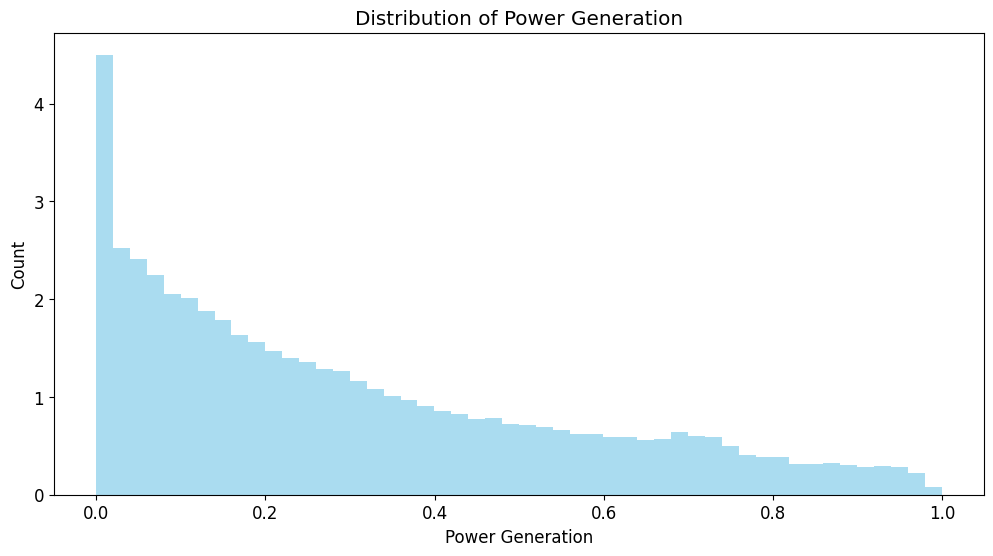

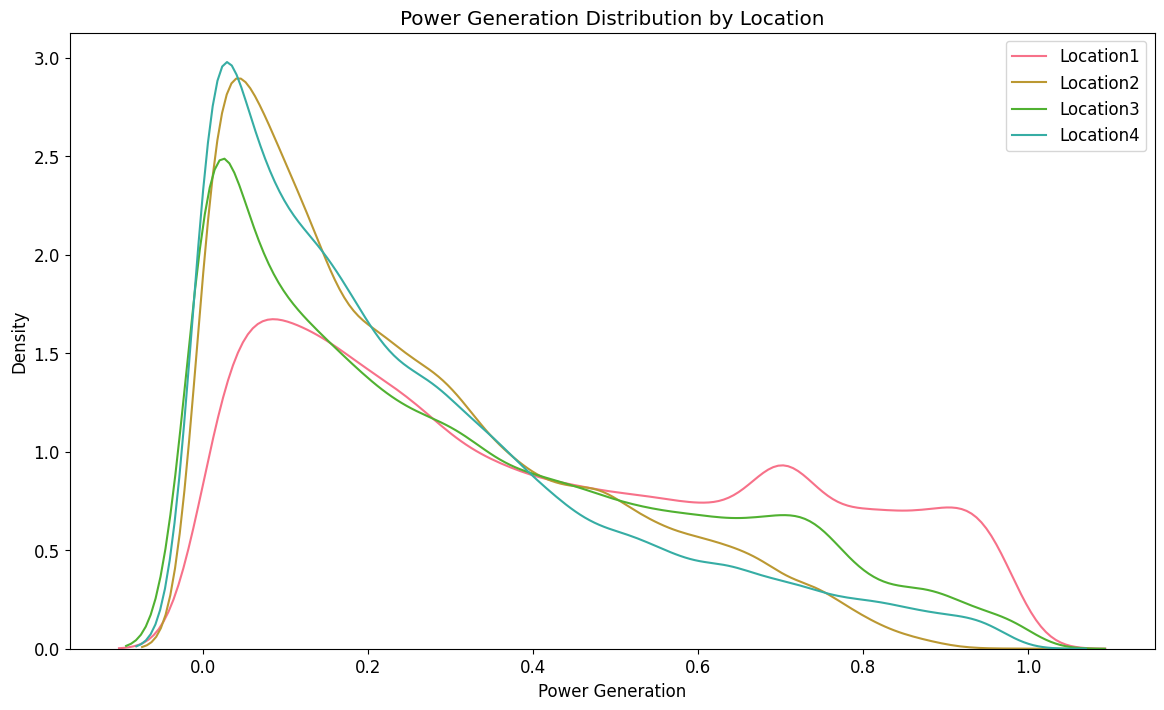

Power Statistics by Location:


count      mean       std  min     25%      50%       75%     max
Location                                                                      
Location1  43800.0  0.405385  0.288322  0.0  0.1489  0.34765  0.659600  0.9913
Location2  43800.0  0.249902  0.209088  0.0  0.0762  0.19495  0.381800  0.9859
Location3  43800.0  0.307503  0.263879  0.0  0.0770  0.24070  0.498400  0.9994
Location4  43800.0  0.250926  0.228814  0.0  0.0667  0.18470  0.371825  0.9888

In [16]:
#Overall power distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Power'], bins=50, density=True, alpha=0.7, color='skyblue')
plt.title('Distribution of Power Generation')
plt.xlabel('Power Generation')
plt.ylabel('Count')
plt.show()
    
# Power distribution by location
plt.figure(figsize=(14, 8))
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    sns.kdeplot(loc_data['Power'], label=loc)
plt.title('Power Generation Distribution by Location')
plt.xlabel('Power Generation')
plt.ylabel('Density')
plt.legend()
plt.show()
    
# Power statistics by location\n",
power_stats = df.groupby('Location')['Power'].describe()
print("Power Statistics by Location:")
display(power_stats)

Wind Characteristics Analysis

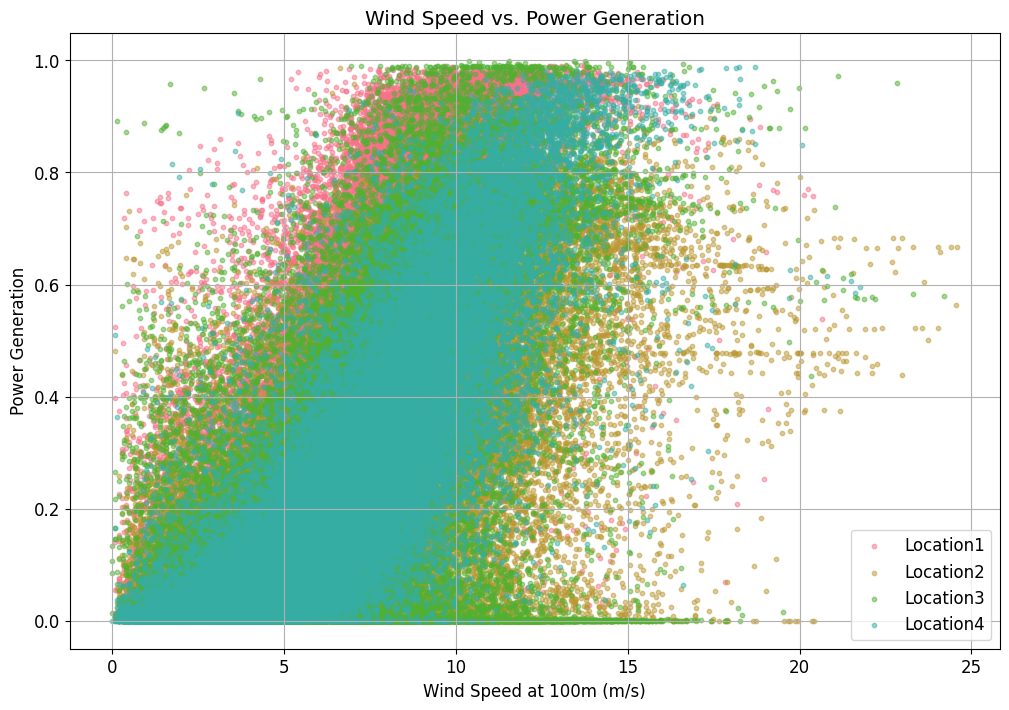

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


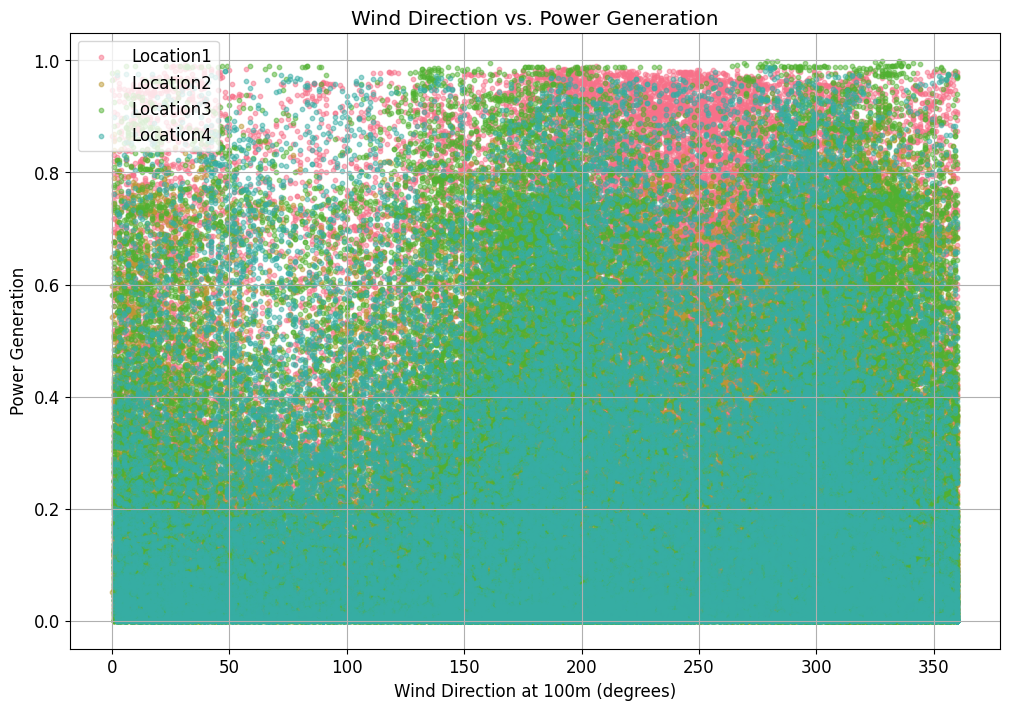

Correlation between wind features and power:


Power                 1.000000
windspeed_100m        0.622108
windgusts_10m         0.568818
windspeed_10m         0.564750
winddirection_100m    0.136620
winddirection_10m     0.128059
Name: Power, dtype: float64

In [17]:
# Wind speed vs. Power scatter plot
plt.figure(figsize=(12, 8))
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    plt.scatter(loc_data['windspeed_100m'], loc_data['Power'],
               label=loc, alpha=0.5, s=10)
plt.title('Wind Speed vs. Power Generation')
plt.xlabel('Wind Speed at 100m (m/s)')
plt.ylabel('Power Generation')
plt.legend()
plt.grid(True)
plt.show()
    
# Wind direction vs. Power scatter plot
plt.figure(figsize=(12, 8))
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    plt.scatter(loc_data['winddirection_100m'].values, 
               loc_data['Power'].values, 
               label=loc, alpha=0.5, s=10)
plt.title('Wind Direction vs. Power Generation')
plt.xlabel('Wind Direction at 100m (degrees)')
plt.ylabel('Power Generation')
plt.legend()
plt.grid(True)
plt.show()
    
# Correlation between wind features and power
wind_features = ['windspeed_10m', 'windspeed_100m', 'winddirection_10m', 
                'winddirection_100m', 'windgusts_10m']
correlations = df[wind_features + ['Power']].corr()['Power'].sort_values(ascending=False)
print("Correlation between wind features and power:")
display(correlations)

 Temporal Patterns Analysis

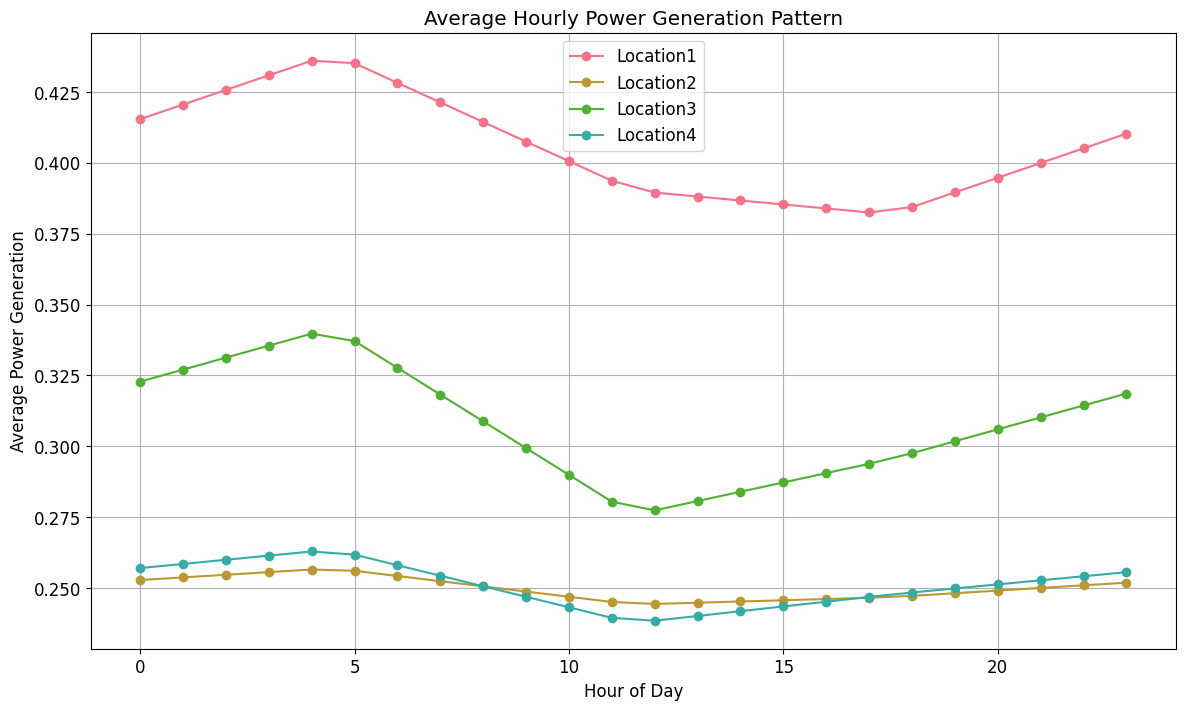

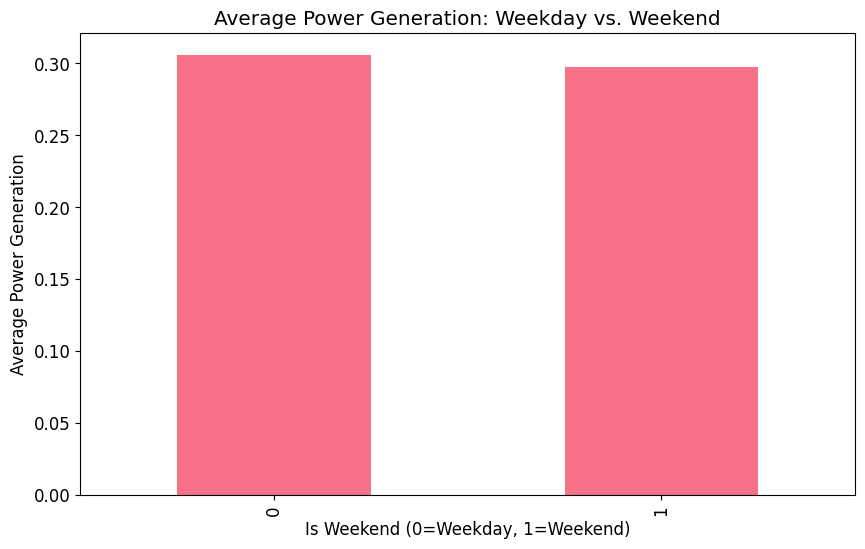

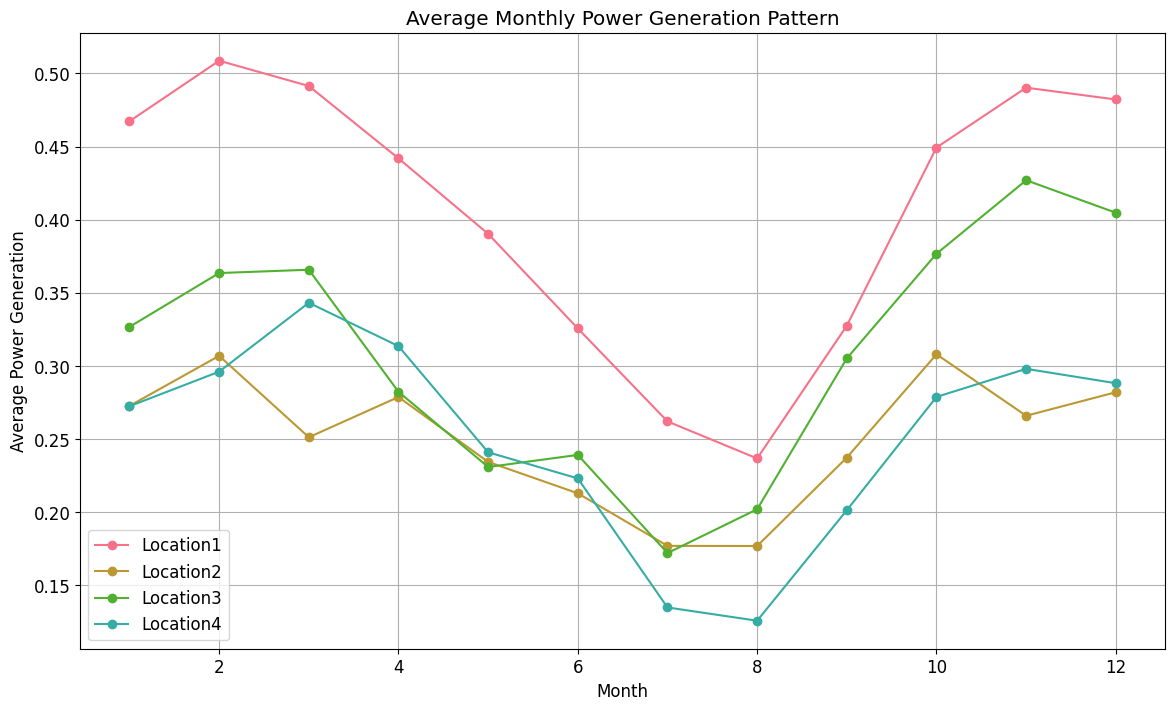

In [18]:
# Hourly pattern
plt.figure(figsize=(14, 8))
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    hourly_pattern = loc_data.groupby('hour')['Power'].mean()
    plt.plot(hourly_pattern.index, hourly_pattern.values, label=loc, marker='o')
plt.title('Average Hourly Power Generation Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power Generation')
plt.legend()
plt.grid(True)
plt.show()
   
# Weekend vs. Weekday pattern
plt.figure(figsize=(10, 6))
weekday_weekend = df.groupby('is_weekend')['Power'].mean()
weekday_weekend.plot(kind='bar')
plt.title('Average Power Generation: Weekday vs. Weekend')
plt.xlabel('Is Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Average Power Generation')
plt.show()
  
# Monthly pattern
plt.figure(figsize=(14, 8))
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    monthly_pattern = loc_data.groupby('month')['Power'].mean()
    plt.plot(monthly_pattern.index, monthly_pattern.values, label=loc, marker='o')
plt.title('Average Monthly Power Generation Pattern')
plt.xlabel('Month')
plt.ylabel('Average Power Generation')
plt.legend()
plt.grid(True)
plt.show()

Weather Impact Analysis

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


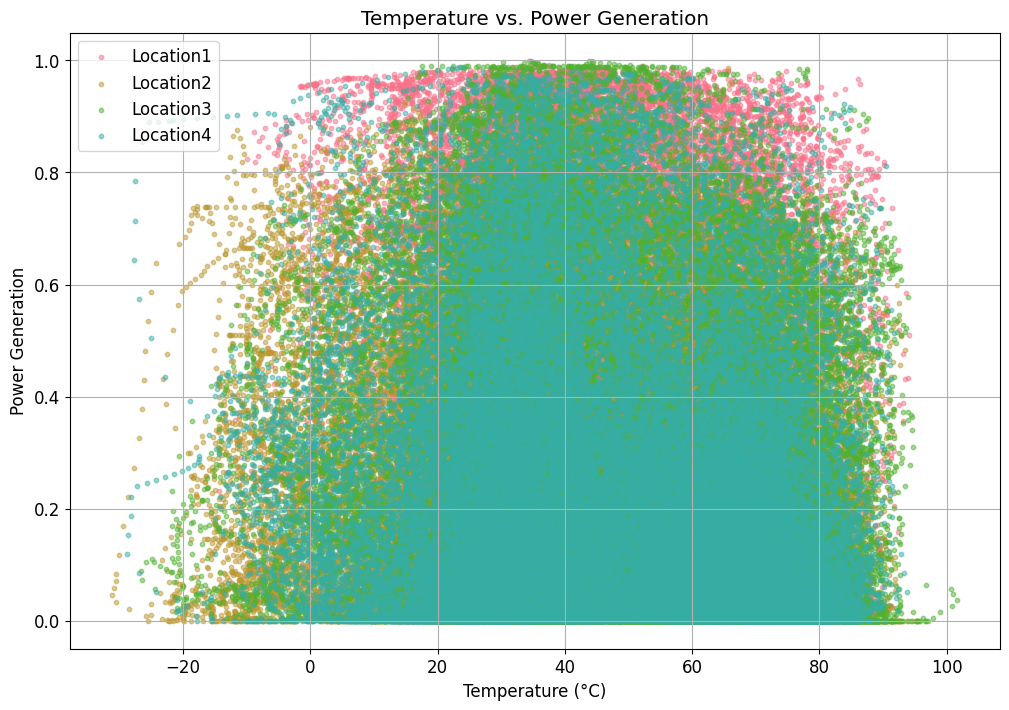

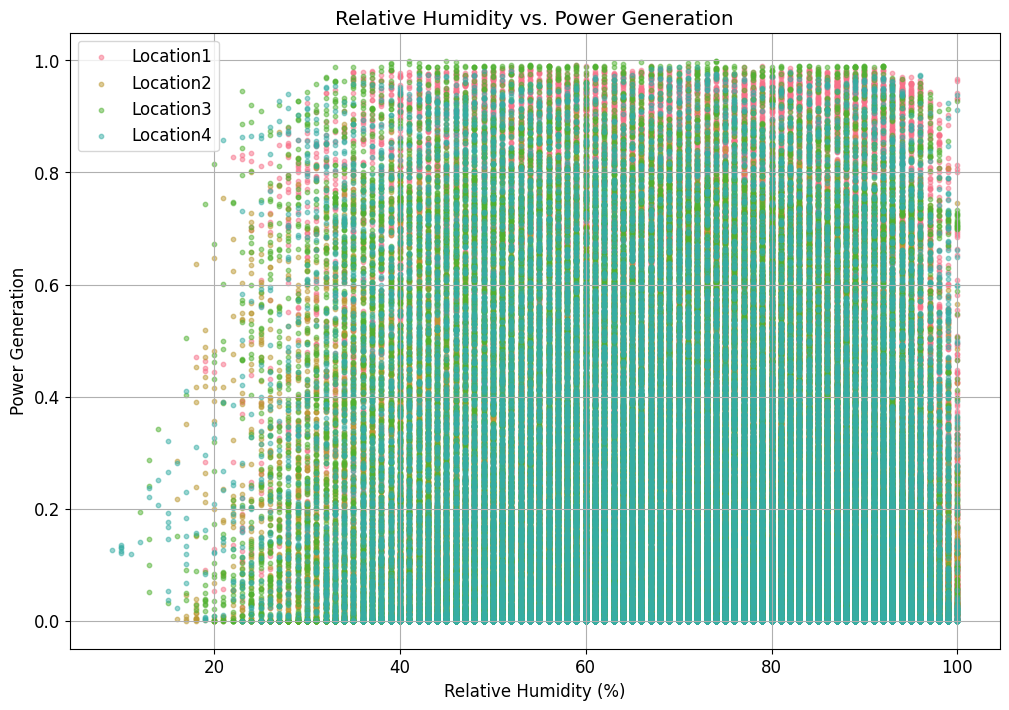

Correlation between weather features and power:


Power                  1.000000
relativehumidity_2m   -0.031405
temperature_2m        -0.141187
dewpoint_2m           -0.146789
Name: Power, dtype: float64

In [19]:
# Temperature vs. Power
plt.figure(figsize=(12, 8))
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    plt.scatter(loc_data['temperature_2m'], loc_data['Power'], 
               label=loc, alpha=0.5, s=10)
plt.title('Temperature vs. Power Generation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Power Generation')
plt.legend()
plt.grid(True)
plt.show()
    
# Humidity vs. Power
plt.figure(figsize=(12, 8))
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    plt.scatter(loc_data['relativehumidity_2m'], loc_data['Power'], 
               label=loc, alpha=0.5, s=10)
plt.title('Relative Humidity vs. Power Generation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Power Generation')
plt.legend()
plt.grid(True)
plt.show()
    
# Correlation between weather features and power
weather_features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m']
correlations = df[weather_features + ['Power']].corr()['Power'].sort_values(ascending=False)
print("Correlation between weather features and power:")
display(correlations)

Location-Specific Analysis

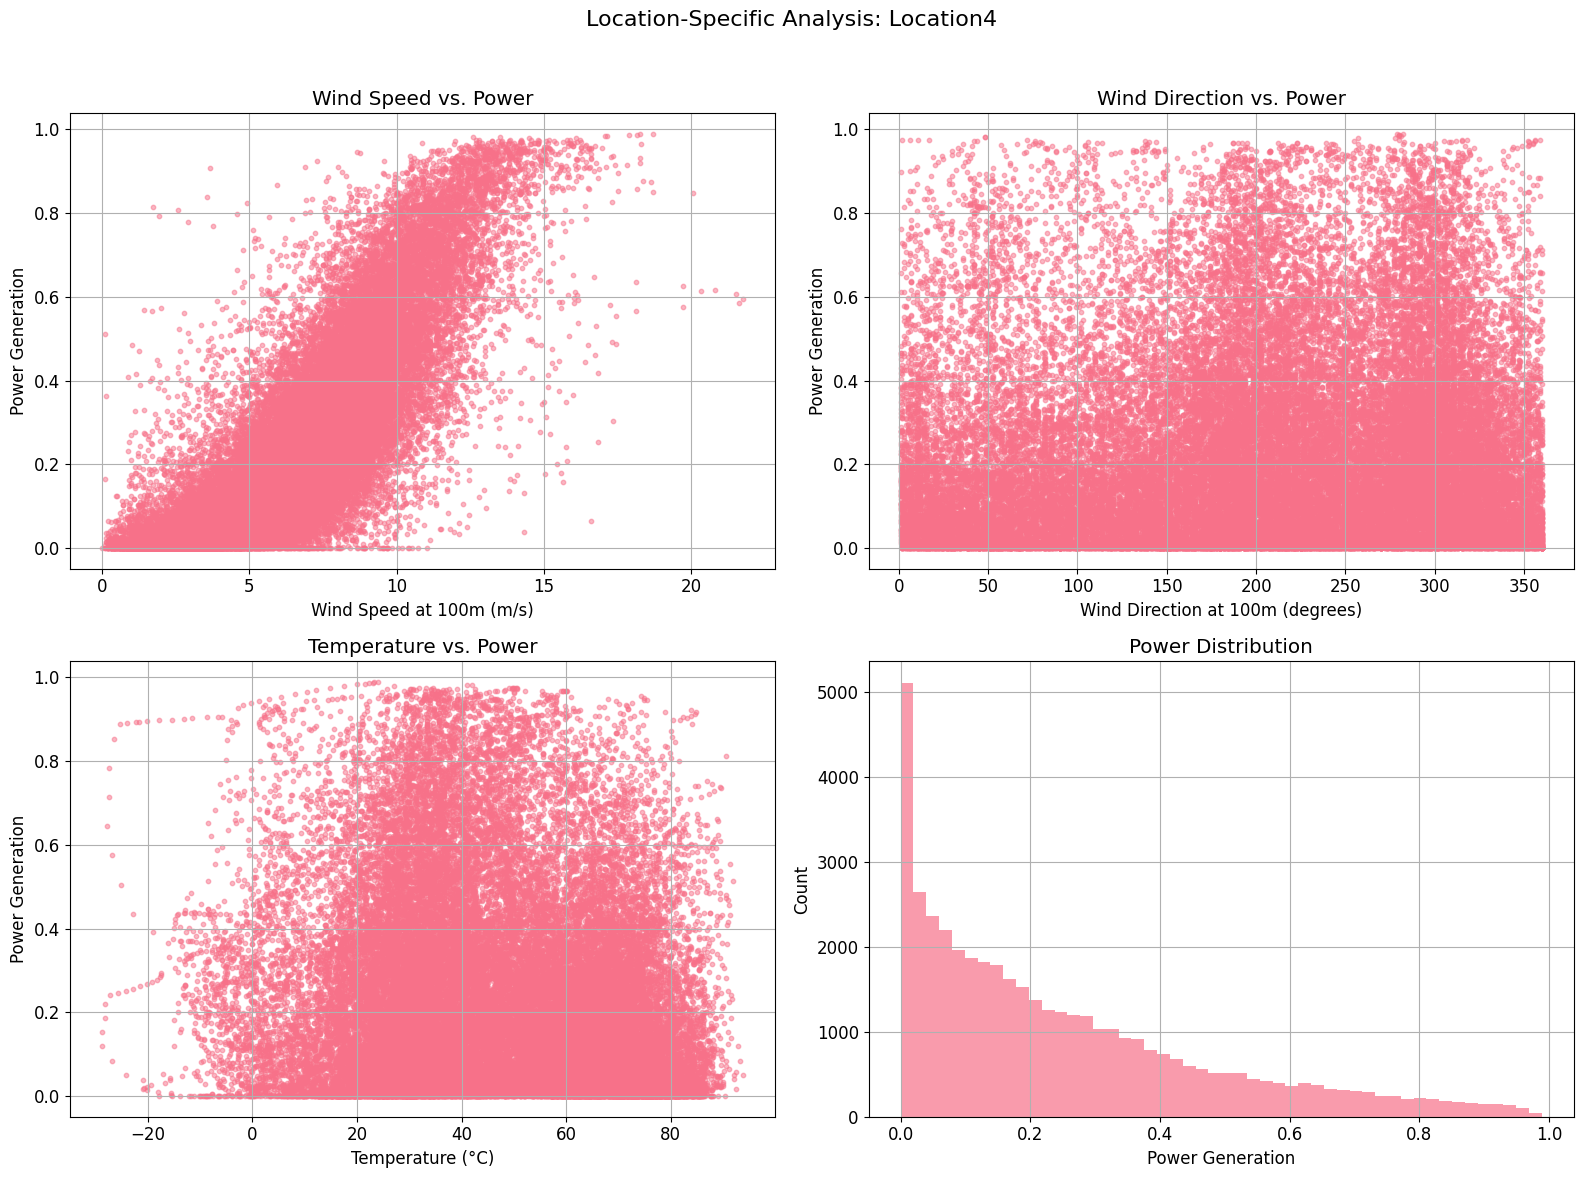

In [20]:
# Location-specific power generation patterns
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Location-Specific Analysis: {loc}', fontsize=16)

# Wind speed vs. Power
axes[0, 0].scatter(loc_data['windspeed_100m'], loc_data['Power'], alpha=0.5, s=10)
axes[0, 0].set_title('Wind Speed vs. Power')
axes[0, 0].set_xlabel('Wind Speed at 100m (m/s)')
axes[0, 0].set_ylabel('Power Generation')
axes[0, 0].grid(True)
   
# Wind direction vs. Power
axes[0, 1].scatter(loc_data['winddirection_100m'], loc_data['Power'], alpha=0.5, s=10)
axes[0, 1].set_title('Wind Direction vs. Power')
axes[0, 1].set_xlabel('Wind Direction at 100m (degrees)')
axes[0, 1].set_ylabel('Power Generation')
axes[0, 1].grid(True)
    
# Temperature vs. Power
axes[1, 0].scatter(loc_data['temperature_2m'], loc_data['Power'], alpha=0.5, s=10)
axes[1, 0].set_title('Temperature vs. Power')
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Power Generation')
axes[1, 0].grid(True)
       
 # Power distribution
axes[1, 1].hist(loc_data['Power'], bins=50, alpha=0.7)
axes[1, 1].set_title('Power Distribution')
axes[1, 1].set_xlabel('Power Generation')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Power Threshold Analysis

<Figure size 1200x800 with 0 Axes>

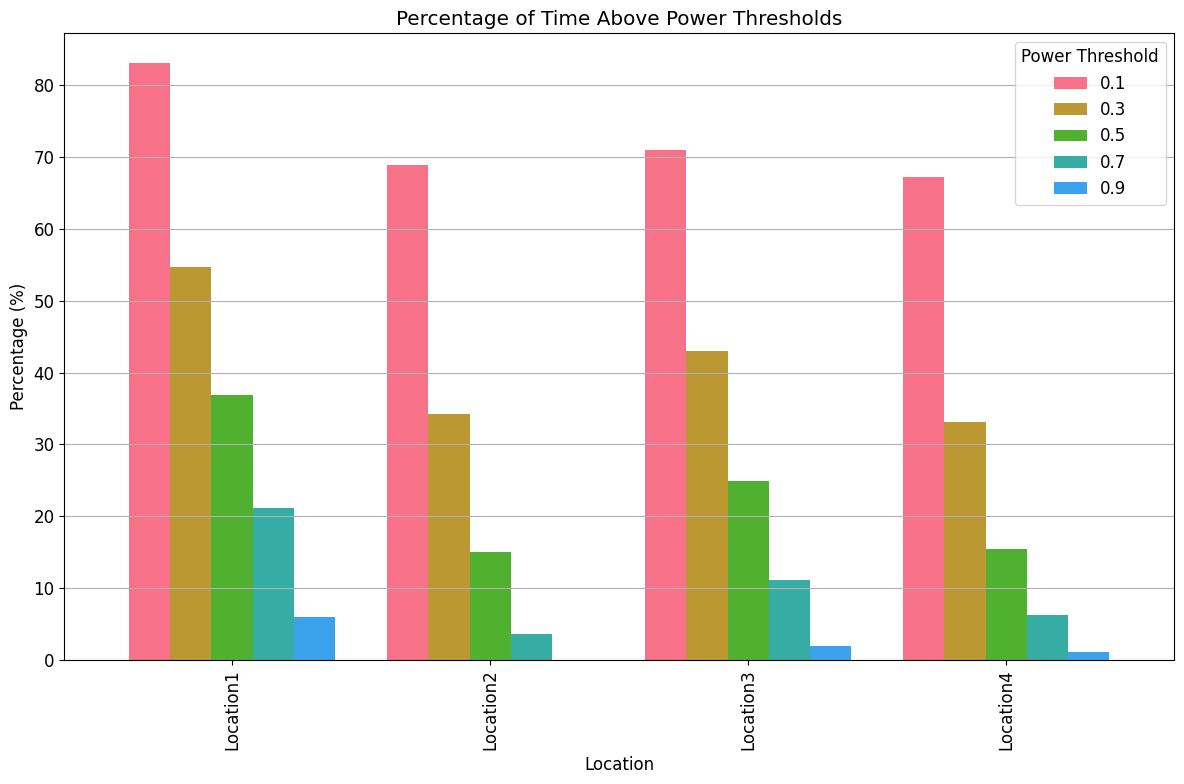

Percentage of time above power thresholds:


0.1        0.3        0.5        0.7       0.9
Location1  83.052511  54.755708  36.917808  21.146119  5.974886
Location2  68.819635  34.166667  15.041096   3.618721  0.025114
Location3  71.038813  43.002283  24.894977  11.086758       2.0
Location4   67.16895  33.127854  15.431507   6.191781  1.166667

In [21]:
# Define power threshold
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
    
# Calculate percentage of time above each threshold
threshold_stats = pd.DataFrame(index=df['Location'].unique(), columns=thresholds)
    
for loc in df['Location'].unique():
    loc_data = df[df['Location'] == loc]
    for threshold in thresholds:
        percentage = (loc_data['Power'] > threshold).mean() * 100
        threshold_stats.loc[loc, threshold] = percentage

# Plot threshold statistics
plt.figure(figsize=(12, 8))
threshold_stats.plot(kind='bar', width=0.8)
plt.title('Percentage of Time Above Power Thresholds')
plt.xlabel('Location')
plt.ylabel('Percentage (%)')
plt.legend(title='Power Threshold')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print("Percentage of time above power thresholds:")
display(threshold_stats)

Data Modelling and Evaluation 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import joblib
import os
import time
from datetime import datetime

In [23]:
# Feature and target selection
X = merged_data.drop('Power', axis=1) # features
y = merged_data['Power'] # target

In [24]:
# Convert Time to datetime and extract features
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day
df['month'] = df['Time'].dt.month
df['day_of_week'] = df['Time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df = df.drop('Time', axis=1)

In [25]:
# Separate features and target
X = df.drop('Power', axis=1)
y = df['Power']
feature_names = X.columns.tolist()

In [26]:
# Handle categorical variables and scale features
X = pd.get_dummies(X, columns=['Location'], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [27]:
# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
val_size_adjusted = 0.2 / (1 - 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size_adjusted, random_state=42)


In [28]:
# Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
start_time = time.time()

In [29]:
for name, model in models.items():
    print(f"Training {name}...")
    model_start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - model_start_time
    
    # Evaluate on validation set
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    results[name] = {
        'model': model,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'train_time': train_time
    }
    
    print(f"  RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}, Train Time: {train_time:.2f}s")

train_time = time.time() - start_time

# Select the best model
best_model_name = min(results, key=lambda k: results[k]['rmse'])
best_model = results[best_model_name]['model']

print(f"\nBest model: {best_model_name}")
print(f"Validation RMSE: {results[best_model_name]['rmse']:.4f}")
print(f"\nTotal training time: {train_time:.2f} seconds")

Training Linear Regression...
  RMSE: 0.1795, MAE: 0.1371, R²: 0.5107, Train Time: 0.10s
Training Random Forest...
  RMSE: 0.1266, MAE: 0.0918, R²: 0.7566, Train Time: 379.58s
Training Gradient Boosting...
  RMSE: 0.1627, MAE: 0.1210, R²: 0.5981, Train Time: 50.31s
Training XGBoost...
  RMSE: 0.1433, MAE: 0.1056, R²: 0.6883, Train Time: 4.38s

Best model: Random Forest
Validation RMSE: 0.1266

Total training time: 438.98 seconds


In [30]:


# Hyperparameter tuning for Random Forest
print("\nTuning hyperparameters for Random Forest...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

tscv = TimeSeriesSplit(n_splits=3)  # Reduced from 5 to 3
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
tune_time = time.time() - start_time




Tuning hyperparameters for Random Forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [31]:
# Get the best model
tuned_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {-grid_search.best_score_:.4f} (MSE)")

# Evaluate tuned model on validation set
y_pred = tuned_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE with tuned model: {rmse:.4f}")
print(f"\nTotal tuning time: {tune_time:.2f} seconds")

# Final evaluation on test set
print("\nEvaluating model on test set...")
y_pred = tuned_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.0195 (MSE)
Validation RMSE with tuned model: 0.1264

Total tuning time: 1426.95 seconds

Evaluating model on test set...
Test RMSE: 0.1266
Test MAE: 0.0917
Test R²: 0.7599


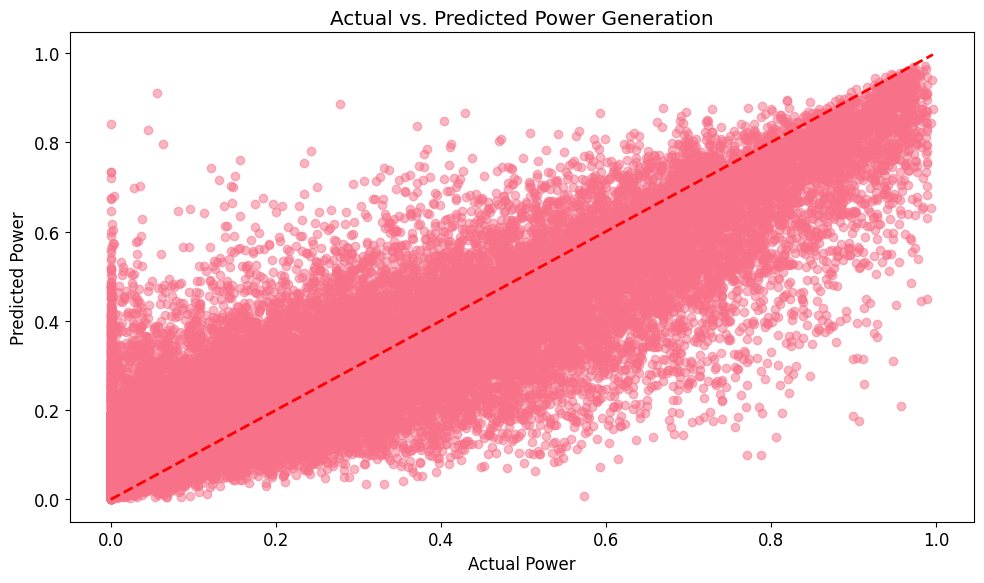

In [32]:
# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Actual vs. Predicted Power Generation')
plt.tight_layout()
plt.savefig('visualizations/actual_vs_predicted.png')
plt.show()

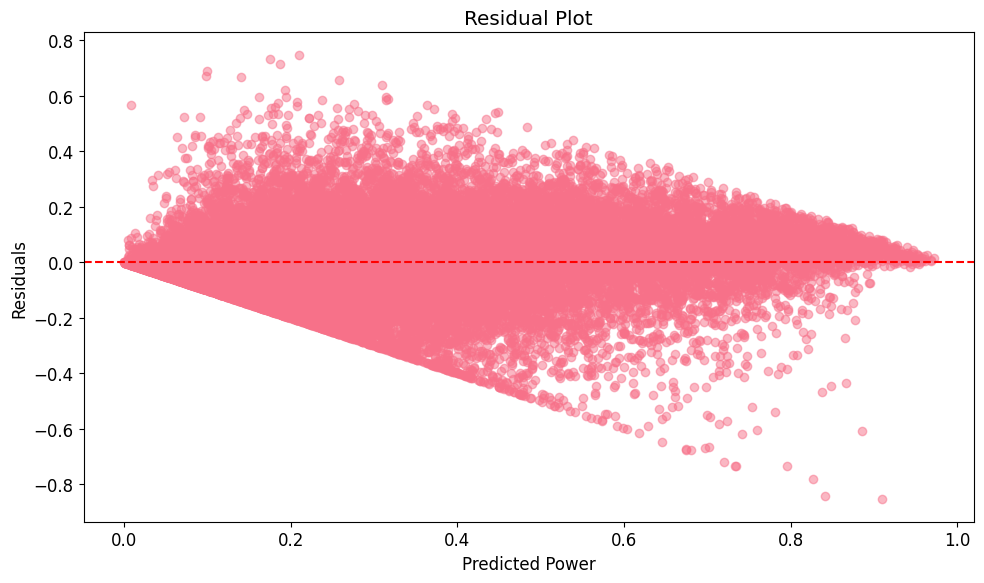

In [33]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Power')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('visualizations/residuals.png')
plt.show()

TypeError: list indices must be integers or slices, not DataFrame

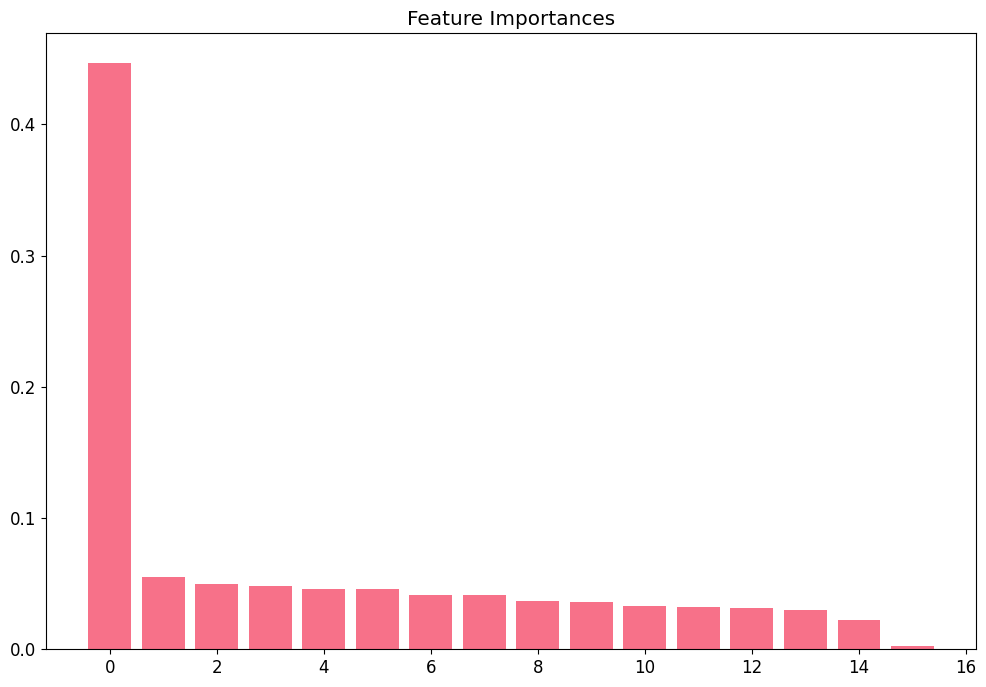

In [ ]:
# Feature importance
importances = tuned_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig('visualizations/feature_importance.png')
plt.show()

# Print top 10 features
print("\nTop 10 important features:")
for i in range(min(10, len(feature_names))):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set
y_pred = tuned_model.predict(X_test)  

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R² Score: {r2:.4f}")


Test RMSE: 0.1266
Test MAE: 0.0917
Test R² Score: 0.7599
